In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date    : Nov-14-20 10:12
# @Author  : Kelly Hwong (dianhuangkan@gmail.com)
# @Link    : http://example.org

import os
import argparse
from datetime import datetime
from utils.data_utils import get_test_generator
from keras_fn.model_utils import create_model
from utils.data_utils import data_generators

def cmd_parser():
    """parse arguments
    """
    parser = argparse.ArgumentParser()

    # Testing parameters
    parser.add_argument('--batch_size', type=int, dest='batch_size',
                        action='store', default=32, help='batch_size, e.g. 16.')  # 16 for Mac, 64, 128 for server

    args = parser.parse_args()
    return args

batch_size = 32

In [2]:
# data path
competition_name = "dogs-vs-cats-redux-kernels-edition"
data_dir = os.path.expanduser(
    f"~/.kaggle/competitions/{competition_name}")

model_type = "keras.applications.ResNet50V2"

# experiment time
#     date_time = datetime.now().strftime("%Y%m%d-%H%M%S")
date_time = "20201113-221740"
ckpt_dir = os.path.expanduser(os.path.join(
    "~", "Documents", "DeepLearningData", competition_name, "ckpts", model_type, date_time))

# Input parameters
IMAGE_WIDTH = IMAGE_HEIGHT = 128
image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2

# Data loader
test_generator, test_df = get_test_generator(
    data_dir, target_size=image_size, batch_size=batch_size)

model = create_model(model_type, input_shape, num_classes, pretrain=False)

# Load ckpt
ckpt = os.path.join(
    ckpt_dir, "keras.applications.ResNet50V2-epoch-080-val_loss-0.1708.h5")
assert os.path.isfile(ckpt)
model.load_weights(ckpt)

pred = model.predict(test_generator, workers=4, verbose=1)

Found 12500 validated image filenames.
391/391 [==============================] - 14s 36ms/step


In [7]:
# Input parameters
IMAGE_WIDTH = IMAGE_HEIGHT = 128
image_size = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2

batch_size = 32

# Data loaders
train_generator, validation_generator = data_generators(
    data_dir, target_size=image_size, batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [8]:
pred_on_train = model.predict(train_generator, workers=4, verbose=1)

625/625 [==============================] - 48s 77ms/step


In [15]:
pred_on_val = model.predict(validation_generator, workers=4, verbose=1)

157/157 [==============================] - 6s 38ms/step


In [9]:
import matplotlib.pyplot as plt

(array([8972.,  290.,  167.,  123.,   89.,   89.,   98.,  114.,  186.,
        9872.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

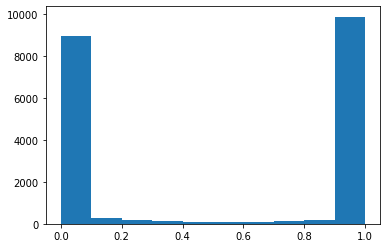

In [12]:
plt.hist(pred_on_train[:, class_indices["dog"]])

(array([2215.,   61.,   38.,   21.,   27.,   23.,   35.,   29.,   30.,
        2521.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

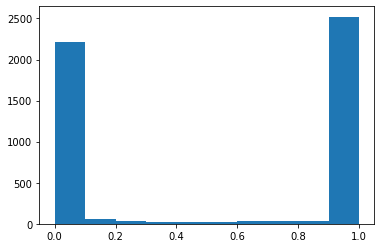

In [16]:
plt.hist(pred_on_val[:, class_indices["dog"]])

(array([6.900e+01, 8.595e+03, 3.054e+03, 5.840e+02, 1.360e+02, 4.700e+01,
        4.000e+00, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([0.33395162, 0.3370193 , 0.34008697, 0.3431546 , 0.34622228,
        0.34928995, 0.35235763, 0.3554253 , 0.35849294, 0.3615606 ,
        0.3646283 ], dtype=float32),
 <a list of 10 Patch objects>)

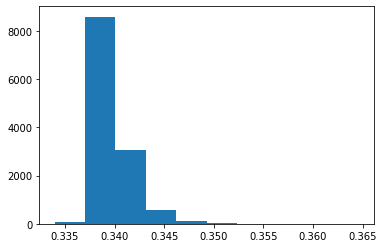

In [13]:
plt.hist(pred[:, class_indices["dog"]])

In [3]:
#
class_indices = {"cat": 0, "dog": 1}
test_df['label'] = pred[:, class_indices["dog"]]

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0].astype(int)
submission_df.drop(['filename'], axis=1, inplace=True)
submission_df['label'] = test_df['label']
submission_df = submission_df.sort_values(by="id")
submission_df = submission_df.reindex(['id','label'],axis=1)
submission_path = f"./submissions/submission-{model_type}-{date_time}.csv"
submission_df.to_csv(submission_path, index=False)

In [4]:
submission_df

,id,label
9135,1,0.338813
9081,2,0.341551
11837,3,0.349661
3008,4,0.342866
9396,5,0.342639
...,...,...
946,12496,0.340107
7707,12497,0.342186
2355,12498,0.340149
6058,12499,0.340922


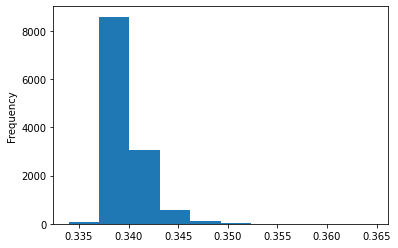

In [5]:
submission_df['label'].plot.hist()